In [75]:
import pandas as pd
import plotly.express as px
import seaborn as sns
from matplotlib.pyplot import title
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt
import plotly.io as pio





In [4]:
data=pd.read_csv("../Loan_Default.csv", sep=",")
print(data.head())
print(data.info())
print(data.isna().sum())

      ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   
2  24892  2019         cf               Male           pre     type1   
3  24893  2019         cf               Male         nopre     type1   
4  24894  2019         cf              Joint           pre     type1   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
0           p1                l1        nopc                  nob/c  ...   
1           p1                l1        nopc                    b/c  ...   
2           p1                l1        nopc                  nob/c  ...   
3           p4                l1        nopc                  nob/c  ...   
4           p1                l1        nopc                  nob/c  ...   

   credit_type  Credit_Score  co-applicant_credit_type    age  \
0          EXP           758                 

In [42]:
data.fillna(data.isna().median(),inplace=True)
print(data.isna().sum())

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status  

In [70]:
z_score=np.abs(stats.zscore(data["loan_amount"]))
threeshold=4
aoutliers=data[z_score>threeshold]
print("nb aoutliers : \n",aoutliers["loan_amount"].shape)
data.drop(aoutliers.index,inplace=True)
print(data.info())
print(data.isna().sum())

nb aoutliers : 
 (0,)
<class 'pandas.core.frame.DataFrame'>
Index: 147862 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         147862 non-null  int64  
 1   year                       147862 non-null  int64  
 2   loan_limit                 147862 non-null  object 
 3   Gender                     147862 non-null  object 
 4   approv_in_adv              147862 non-null  object 
 5   loan_type                  147862 non-null  object 
 6   loan_purpose               147862 non-null  object 
 7   Credit_Worthiness          147862 non-null  object 
 8   open_credit                147862 non-null  object 
 9   business_or_commercial     147862 non-null  object 
 10  loan_amount                147862 non-null  int64  
 11  rate_of_interest           147862 non-null  float64
 12  Interest_rate_spread       147862 non-null  float64
 13  Upfront_char

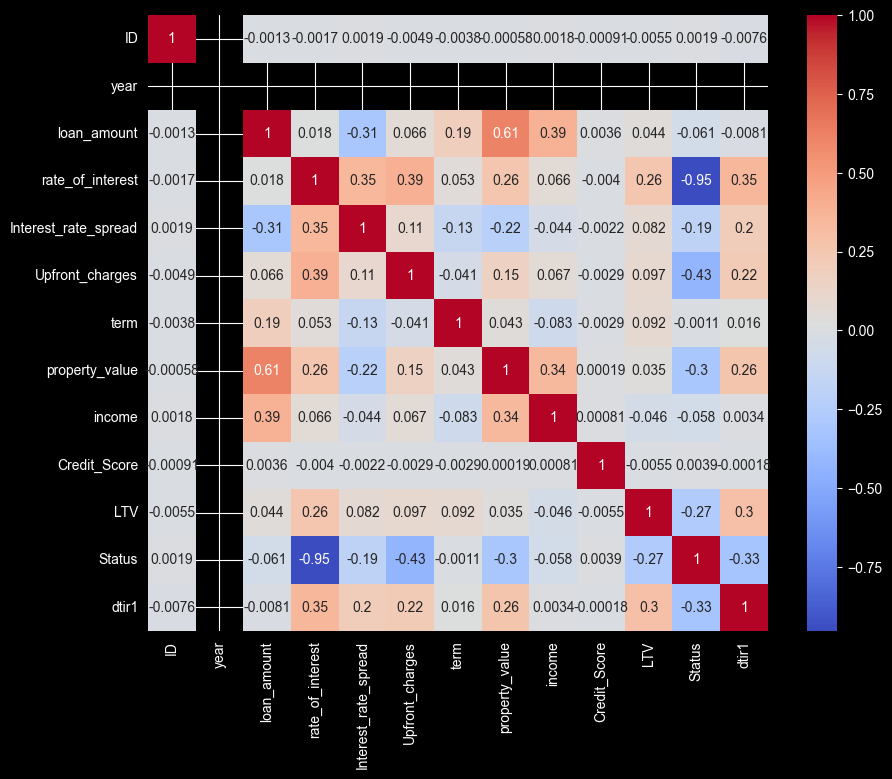

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

In [52]:
age_loan=data.groupby("age")["loan_amount"].mean().reset_index()
age_loan=age_loan.sort_values(by="loan_amount",ascending=False)
print(age_loan.head())
fig=px.bar(age_loan,x="age",y="loan_amount",title="Age vs Loan Amount")
pio.renderers.default = "browser"
fig.show()

     age    loan_amount
2  35-44  370061.475661
1  25-34  355177.002043
3  45-54  345571.758117
4  55-64  300768.149521
5  65-74  265468.653251


In [ ]:
age_loan=data.groupby("age")["loan_amount"].mean().reset_index()
age_loan=age_loan.sort_values(by="loan_amount",ascending=False)
print(age_loan.head())
fig=px.bar(age_loan,x="age",y="loan_amount",title="Age vs Loan Amount")
pio.renderers.default = "browser"
fig.show()

In [76]:
feat=data.drop("loan_amount",axis=1)
feat_code = pd.get_dummies(feat, drop_first=True)
tar=data["loan_amount"]
x_train,x_test,y_train,y_test = train_test_split(feat_code,tar,test_size=0.2,random_state=42)
model= DecisionTreeRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("rondement pour loan amount : {} %".format(accuracy_score(y_test,y_pred)*100))

rondement pour loan amount : 66.52182510125296 %


In [65]:
feat=data.drop("Status",axis=1)
feat_code = pd.get_dummies(feat, drop_first=True)
tar=data["loan_amount"]
x_train,x_test,y_train,y_test = train_test_split(feat_code,tar,test_size=0.2,random_state=42)
model= DecisionTreeRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("rondement pour status : {} %".format(accuracy_score(y_test,y_pred)*100))

rondement pour status : 100.0 %
